In [285]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

#Reading the companies text file.
companies =pd.read_csv('C:\\Users\\patrap\\Pictures\\upGrad\\companies.txt',sep="\t", encoding="ISO-8859-1")
unique_company = companies.permalink.nunique(dropna = True) 
print("Total companies in companies file: ",unique_company)
#Converting to lower case for merging
companies['permalink'] = companies['permalink'].str.lower()

#Reading the rounds2 csv file.
rounds2 = pd.read_csv("C:\\Users\\patrap\\Pictures\\upGrad\\rounds2.csv", encoding="ISO-8859-1")
unique_round2 = rounds2.company_permalink.nunique(dropna = True)
print("Total companies in rounds2 file: ",unique_round2)
#Converting to lower case for merging
rounds2['company_permalink'] = rounds2['company_permalink'].str.lower()

#Merging both the companies and rounds2 data based on the unique value.
master_frame = pd.merge(rounds2,companies, left_on='company_permalink', right_on='permalink',how ='left')
master_frame = master_frame.dropna()
count_row = master_frame.shape[0]
print("Total count of elements after merge: ",count_row)

# Calculating the most representative value of the investment amount based on funding type.
master_frame_mean = master_frame.groupby(['funding_round_type']).mean().round().loc[['angel','venture','seed','private_equity']].sort_values(by='raised_amount_usd',ascending=False)
master_frame_mean = master_frame_mean.dropna()
print(master_frame_mean)

#Filtering the dataframe based on the funding type whichc is in range of 5M to 15M USD.
top9 = master_frame.loc[master_frame['funding_round_type']=='venture'].groupby(['country_code','funding_round_type'], as_index=False).sum().round().sort_values(by="raised_amount_usd",ascending=False).head(9)
print(top9)

#Adding a new column primary_sector from the category_list column in the master frame.
master_frame= master_frame.loc[master_frame['funding_round_type']=='venture']
master_frame['primary_sector'] = master_frame['category_list'].str.split('|').str[0]
master_frame.head(9)

#Getting the sector dataframe from the mapping.csv based on the 8 main sectors.
sector_mapping =pd.read_csv('C:\\Users\\patrap\\Pictures\\upGrad\\mapping.csv', encoding="ISO-8859-1")
sector_mapping['main_sector'] = pd.get_dummies(sector_mapping).idxmax(1)
sector_mapping.drop(sector_mapping.iloc[:, 1:10], inplace = True, axis = 1)
sector_mapping.dropna(subset = ["category_list"], inplace=True)
sector_mapping.head(20)

#Merging the sector dataframe with master frame.
master_frame_sector = pd.merge(master_frame,sector_mapping, left_on='primary_sector', right_on='category_list',how ='left').drop(['category_list_y'], axis = 1)
master_frame_sector.head(9)

#D1 for the top1 engligh speaking country and having fund between 5M USD to 15M USD.
D1= master_frame_sector.loc[master_frame_sector['country_code']=='USA']
D1 = D1[(5000000 <= D1['raised_amount_usd']) & (D1['raised_amount_usd'] <= 15000000)]
country_dataframe1 = D1.groupby(['main_sector'],as_index=False).sum().round(3).rename(columns = {"raised_amount_usd": "total_investments"}).sort_values(by='total_investments',ascending=False)
print(country_dataframe1)
count = D1.groupby(['main_sector']).size().reset_index(name='total_investments_count').sort_values(by='total_investments_count',ascending=False)
print(count)

investment = pd.merge(country_dataframe1, count, how= 'left')
print(investment)
D1 = pd.merge(D1,investment, how= 'left',on = 'main_sector' )
D1.head()

#D2 for the top2 engligh speaking country and having fund between 5M USD to 15M USD.
D2= master_frame_sector.loc[master_frame_sector['country_code']=='GBR']
D2 = D2[(5000000 <= D2['raised_amount_usd']) & (D2['raised_amount_usd'] <= 15000000)]
country_dataframe2 = D2.groupby(['main_sector'],as_index=False).sum().round(3).rename(columns = {"raised_amount_usd": "total_investments"}).sort_values(by='total_investments',ascending=False)
print(country_dataframe2)
count = D2.groupby(['main_sector']).size().reset_index(name='total_investments_count').sort_values(by='total_investments_count',ascending=False)
print(count)

investment = pd.merge(country_dataframe2, count, how= 'left', on = 'main_sector')
#print(investment)
D2 = pd.merge(D1,investment, how= 'left',on = 'main_sector' )
D2.head()

#D3 for the top3 engligh speaking country and having fund between 5M USD to 15M USD.
D3= master_frame_sector.loc[master_frame_sector['country_code']=='IND']
D3 = D3[(5000000 <= D3['raised_amount_usd']) & (D3['raised_amount_usd'] <= 15000000)]
country_dataframe3 = D3.groupby(['main_sector'],as_index=False).sum().round(3).rename(columns = {"raised_amount_usd": "total_investments"}).sort_values(by='total_investments',ascending=False)
print(country_dataframe3)
count = D3.groupby(['main_sector']).size().reset_index(name='total_investments_count').sort_values(by='total_investments_count',ascending=False)
print(count)

investment = pd.merge(country_dataframe3, count, how= 'left', on = 'main_sector')
#print(investment)
D3 = pd.merge(D1,investment, how= 'left',on = 'main_sector' )
D3.head()

#Getting the results for table 5.1 based on sectors.
master_frame_sector_cmpny = master_frame_sector.loc[master_frame_sector['main_sector']== 'News, Search and Messaging'].groupby(['company_permalink','main_sector']).sum().sort_values(by='raised_amount_usd',ascending=False)
master_frame_sector_cmpny.head()



Total companies in companies file:  66368
Total companies in rounds2 file:  90247
Total count of elements after merge:  22044
                    raised_amount_usd
funding_round_type                   
private_equity             38633724.0
venture                    15177300.0
seed                        3590040.0
angel                       1826335.0
   country_code funding_round_type  raised_amount_usd
63          USA            venture       2.539460e+11
12          CHN            venture       2.478925e+10
24          GBR            venture       1.014902e+10
30          IND            venture       9.824228e+09
9           CAN            venture       5.182127e+09
33          ISR            venture       4.736166e+09
17          DEU            venture       4.185196e+09
23          FRA            venture       3.854152e+09
57          SWE            venture       2.120097e+09
                               main_sector  total_investments
6                                   Others  

,,raised_amount_usd
company_permalink,main_sector,
/organization/pinterest,"News, Search and Messaging",1.315000e+09
/organization/spotify,"News, Search and Messaging",1.063779e+09
/organization/dianping,"News, Search and Messaging",1.041000e+09
/organization/lyft,"News, Search and Messaging",1.011000e+09
/organization/metropcs-communications,"News, Search and Messaging",7.390000e+08


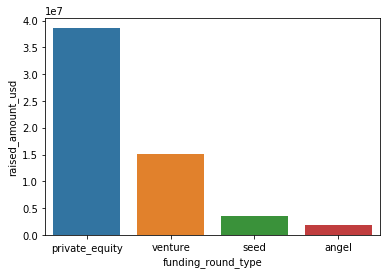

In [299]:
%matplotlib inline
master_frame_mean['funding_round_type'] = master_frame_mean.index
ax = sns.barplot(y='raised_amount_usd', x="funding_round_type", data=master_frame_mean)


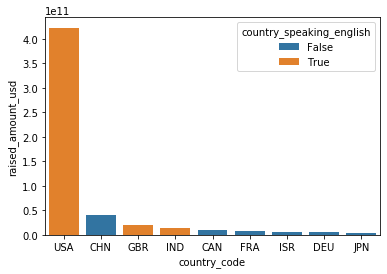

In [225]:
top9["country_speaking_english"] = top9["country_code"].isin(["USA", "GBR",'IND'])

sns.barplot(y='raised_amount_usd', x="country_code", data=top9, hue="country_speaking_english", dodge=False)


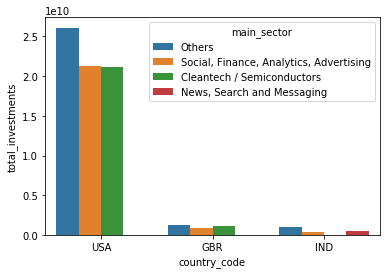

In [281]:
master_frame_country = master_frame_sector.loc[master_frame_sector['country_code'].isin(['USA','GBR','IND'])]
master_frame_country = master_frame_country[(5000000 <= master_frame_country['raised_amount_usd']) & (master_frame_country['raised_amount_usd'] <= 15000000)]
country_dataframe1 = master_frame_country.groupby(['country_code','main_sector'],as_index=False).sum().round(3).rename(columns = {"raised_amount_usd": "total_investments"}).sort_values(by='total_investments',ascending=False)
country_dataframe2 = country_dataframe1.loc[~((country_dataframe1['main_sector']=='News, Search and Messaging') & ~ ( master_frame_sector['country_code'].isin(['USA','GBR'])))]
country_dataframe3 = country_dataframe2.loc[~((country_dataframe1['main_sector']=='Cleantech / Semiconductors') & ( country_dataframe2['country_code'].isin(['IND'])))]
country_dataframe4 = country_dataframe3.loc[~(country_dataframe1['main_sector'].isin(['Health','Manufacturing','Entertainment','Automotive & Sports']))]
sns.barplot(y='total_investments', x="country_code", data=country_dataframe4, hue="main_sector")
 

([<matplotlib.patches.Wedge at 0x291abbb53c8>,
 [Text(-0.5064422856818613, 0.976481546816596, 'private_equity'),
  Text(0.2089844326666916, -1.0799655119044225, 'venture'),
  Text(1.0198189139787868, -0.412273431949147, 'seed'),
  Text(1.0948424775649073, -0.10639525045572205, 'angel')],
 [Text(-0.2762412467355607, 0.5326262982635978, '65.2%'),
  Text(0.1139915087272863, -0.5890720974024122, '25.6%'),
  Text(0.5562648621702473, -0.22487641742680745, '6.1%'),
  Text(0.5971868059444948, -0.058033772975848386, '3.1%')])

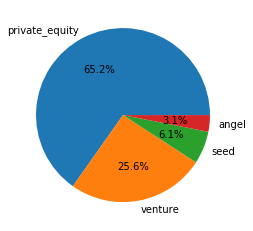

In [309]:
plt.pie(master_frame_mean['raised_amount_usd'], labels=master_frame_mean['funding_round_type'] ,autopct='%1.1f%%')
